In [ ]:
!pip install underthesea==1.2.1

     |████████████████████████████████| 7.5MB 7.7MB/s 
     |████████████████████████████████| 6.7MB 28.2MB/s 
     |████████████████████████████████| 1.5MB 59.8MB/s 
     |████████████████████████████████| 747kB 50.5MB/s 
     |████████████████████████████████| 245kB 57.4MB/s 
  Created wheel for nltk: filename=nltk-3.4.5-cp36-none-any.whl size=1449907 sha256=a2f2d9d73ab4d212da9fa340b1a697937e893026ca300647b52d061ea973a7b9
  Stored in directory: /root/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from underthesea import word_tokenize

# Phân tích dữ liệu

In [ ]:
up = files.upload()

KeyboardInterrupt: ignored

In [ ]:
names = []
values = []
temp = []

csv1 = pd.read_csv("data_post_non_reac.csv")
for i in csv1["text"]:
  r = str(i).split()
  l = len(r)
  temp.append(l)
  if names.count(l)==0:
    names.append(l)
names = sorted(names)
print((names))

for i in range(len(names)):
  values.append(temp.count(names[i]))
c=0
print((values))
for i in range(len(names)):
  if names[i]<=50:
    c = c+1
print(c)
plt.figure(figsize=(20, 3))
plt.subplot(131)
plt.bar(names, values)


In [ ]:

csv1 = pd.read_csv("data_post_reac.csv")

names = []
values = []
temp = []
for i in csv1["text"]:
  r = str(i).split()
  l = len(r)
  temp.append(l)
  if names.count(l)==0:
    names.append(l)
names = sorted(names)
print((names))

for i in range(len(names)):
  values.append(temp.count(names[i]))
c=0
print((values))
for i in range(len(names)):
  if names[i]<=50:
    c = c+1
print(c)
plt.plot(names,values)


In [ ]:

csv1 = pd.read_csv("data_comment_reac.csv")

names = []
values = []
temp = []
for i in csv1["text"]:
  r = str(i).split()
  l = len(r)
  temp.append(l)
  if names.count(l)==0:
    names.append(l)
names = sorted(names)
print((names))

for i in range(len(names)):
  values.append(temp.count(names[i]))
c=0
print((values))
for i in range(len(names)):
  if names[i]<=50:
    c = c+1
print(c)
plt.plot(names,values)


In [ ]:

csv1 = pd.read_csv("data_comment_non_reac.csv")

names = []
values = []
temp = []
for i in csv1["text"]:
  r = str(i).split()
  l = len(r)
  temp.append(l)
  if names.count(l)==0:
    names.append(l)
names = sorted(names)
print((names))

for i in range(len(names)):
  values.append(temp.count(names[i]))
c=0
print((values))
for i in range(len(names)):
  if names[i]<=50:
    c = c+1
print(c)
plt.plot(names,values)


# PRE PROCESSING

In [ ]:
up = files.upload()

Saving final.csv to final.csv


In [ ]:
df = pd.read_csv("final.csv")
df = df.dropna().reset_index(drop=True)
print(df)

                                                    text           labels
0                                    huấn luyện đặc công  không phản động
1        đời lính là những kỉ niệm khó có thể quên được   không phản động
2      phát hiện 1 quả dân chủ nặng 340kg tại 15 cửa ...  không phản động
3      cảm giác của các đồng chí khi gặp tình huống này   không phản động
4                             cả một bầu trời thương nhớ  không phản động
...                                                  ...              ...
10020  la vinh anh thì cần gì coi với chả ko còn em m...        phản động
10021  mở miệng ra là ba que ba sọccoi lại m đi thằng...        phản động
10022  la vinh chơi đồ hả em anh nói mẹ gì 3 đâu mà e...        phản động
10023  t vừa check rồi ông tuấn anh và bà ngọc đã đượ...        phản động
10024  bình minh nguyễn mở miệng ra là phản động ba s...        phản động

[10025 rows x 2 columns]


In [ ]:
# tách từ tiếng việt với underthesea

for i in range(len(df['text'])):
  df['text'][i]=word_tokenize(df['text'][i], format="text")

print(df["text"])

0                                      huấn_luyện đặc_công
1           đời lính là những kỉ_niệm khó có_thể quên được
2        phát_hiện 1 quả dân_chủ nặng 340kg tại 15 cửa_...
3         cảm_giác của các đồng_chí khi gặp tình_huống này
4                               cả một bầu_trời thương_nhớ
                               ...                        
10020    la vinh anh thì cần gì coi với chả ko còn em m...
10021    mở miệng ra là ba_que ba sọccoi lại m đi thằng...
10022    la vinh chơi đồ hả em anh nói mẹ gì 3 đâu mà e...
10023    t vừa check rồi ông tuấn anh và bà ngọc đã đượ...
10024    bình_minh nguyễn mở_miệng ra là phản_động ba s...
Name: text, Length: 10025, dtype: object


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['text'].values)
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X)
print(X)

[[   0    0    0 ... 1288  744   76]
 [   0    0    0 ...  115  830   35]
 [   0    0    0 ...  552  697  217]
 ...
 [   0    0    0 ...  902  364   38]
 [   0    0    0 ... 1794  370  320]
 [   0    0    0 ...   57  189  531]]


In [ ]:
# chuẩn hóa Y: dùng get_dummies

Y = pd.get_dummies(df['labels']).values
print(Y)

[[1 0]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]


In [ ]:
# prepare tập test và validation
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 200)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(8020, 1288) (8020, 2)
(2005, 1288) (2005, 2)


# MODEL SIMPLE RNN


In [ ]:
import tensorflow as tf
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Activation, Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization


In [ ]:
vocab_size = 2000
max_length=1000
embed_dim=5
embedding_dim=16

model = Sequential([
  Embedding(vocab_size, embedding_dim, name="embedding"),
  GlobalAveragePooling1D(),
  Dense(16, activation='relu'),
  Dense(2)
])
print(model.summary())
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          32000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 34        
Total params: 32,306
Trainable params: 32,306
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit( X_train, Y_train, epochs=20, validation_data=(X_test, Y_test), batch_size=128, shuffle=True, verbose=1)

Epoch 1/20
63/63 [==============================] - 3s 15ms/step - loss: 0.6893 - accuracy: 0.5647 - val_loss: 0.6773 - val_accuracy: 0.6090
Epoch 2/20
63/63 [==============================] - 1s 11ms/step - loss: 0.6750 - accuracy: 0.6093 - val_loss: 0.6699 - val_accuracy: 0.6090
Epoch 3/20
63/63 [==============================] - 1s 12ms/step - loss: 0.6755 - accuracy: 0.5939 - val_loss: 0.6690 - val_accuracy: 0.6090
Epoch 4/20
63/63 [==============================] - 1s 11ms/step - loss: 0.6705 - accuracy: 0.6056 - val_loss: 0.6688 - val_accuracy: 0.6090
Epoch 5/20
63/63 [==============================] - 1s 11ms/step - loss: 0.6737 - accuracy: 0.5965 - val_loss: 0.6683 - val_accuracy: 0.6090
Epoch 6/20
63/63 [==============================] - 1s 11ms/step - loss: 0.6768 - accuracy: 0.5880 - val_loss: 0.6677 - val_accuracy: 0.6090
Epoch 7/20
63/63 [==============================] - 1s 11ms/step - loss: 0.6708 - accuracy: 0.6012 - val_loss: 0.6671 - val_accuracy: 0.6090
Epoch 8/20
63

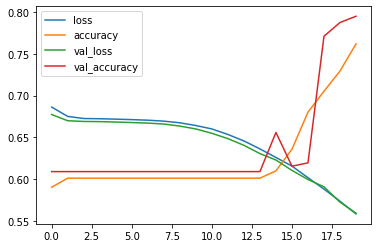

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

# MODEL: RNN WITH LSTM

In [ ]:
y=[]
for i in df["labels"]:
  if i =="không phản động":y.append(0)
  if i =="phản động":y.append(1)
X_train, X_test, Y_train, Y_test = train_test_split(df["text"],y, test_size = 0.2, random_state = 200)
print(X_train[1])
train_dataset = tf.data.Dataset.from_tensor_slices((X_train,Y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test,Y_test))



đời lính là những kỉ_niệm khó có_thể quên được


In [ ]:
for example, label in train_dataset.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

text:  [b'lee duc ng l\xe1\xbb\x9bn \xc4\x91ang tranh_lu\xe1\xba\xadn v\xe1\xbb\x9bi nhau nh\xe1\xba\xa3y \xc4\x91\xc3\xa2u v\xc3\xa0o m\xe1\xbb\x99t th\xe1\xba\xb1ng con_n\xc3\xadt m\xe1\xbb\x9f_mi\xe1\xbb\x87ng l\xc3\xa0 m\xe1\xbb\xb9 m\xe1\xbb\xb9 fb m\xc3\xa0y \xc4\x91ang d\xc3\xb9ng \xc4\x91\xe1\xbb\x83 vi\xe1\xba\xbft cmt c\xc5\xa9ng c\xe1\xbb\xa7a gi\xe1\xba\xb7c m\xe1\xbb\xb9 \xc4\x91\xe1\xba\xa5y m\xc3\xa0y t\xe1\xbb\xb1 ch\xe1\xbb\xadi m\xc3\xa0y h\xe1\xba\xa3 nh\xc3\xb3c'
 b'tuan nguyenduy b\xc3\xbaa qu\xc3\xaan th\xc3\xac tui cung_c\xe1\xba\xa5p cho b\xe1\xba\xa1n c\xc3\xb3 khi b\xe1\xba\xa1n c\xc5\xa9ng m\xc4\x83m me \xc4\x91i search th\xe1\xbb\xad nh\xc6\xb0ng v\xe1\xba\xabn h\xe1\xbb\x8fi cho c\xc3\xb3 t\xe1\xbb\xa5'
 b'tr\xe1\xba\xa7n_d\xc6\xb0\xc6\xa1ng ko th\xc3\xadch \xc4\x91\xc3\xb3 b\xe1\xbb\x99 m\xc3\xa0y \xc4\x91i h\xe1\xbb\x8dc c\xe1\xbb\xa9 b\xe1\xba\xa1n t\xc3\xb4i ko \xc3\xa0 c\xc3\xb2n v\xc4\x83n_h\xc3\xb3a hay ko th\xc3\xac c\xc3\xb2n t\xc3\xb9y n\xe1\xbb\x

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
for example, label in train_dataset.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])

texts:  [b'd\xe1\xba\xa1 v\xc3\xa2ng trong khi c\xc3\xa1n_b\xe1\xbb\x99 l\xc3\xa0 ng\xc6\xb0\xe1\xbb\x9di ch\xe1\xba\xb7t ph\xc3\xa1 r\xe1\xbb\xabng \xc4\x91\xe1\xbb\x83 l\xc3\xa0m_b\xe1\xbb\x99 b\xc3\xa0n_gh\xe1\xba\xbf chanh s\xe1\xba\xa3 trong nh\xc3\xa0 l\xc5\xa9 \xc4\x91\xe1\xba\xbfn th\xc3\xac \xc3\xb9a 13 can b\xe1\xbb\x99 ra \xc4\x91\xe1\xbb\x83 kh\xc3\xb3c th\xc6\xb0\xc6\xa1ng c\xc3\xb2n d\xc3\xa2n th\xc3\xac tr\xc3\xb4i c\xe1\xba\xa3 nh\xc3\xa0 l\xe1\xba\xabn x\xc3\xa1c v\xe1\xba\xabn m\xc3\xa9o c\xc3\xb3 th\xe1\xba\xb1ng c\xc3\xa1n_b\xe1\xbb\x99 n\xc3\xa0o l\xc3\xaan ti\xe1\xba\xbfng'
 b'ku b\xc3\xbaa s\xe1\xba\xbd bi\xe1\xbb\x83u_t\xc3\xacnh \xc4\x91\xe1\xbb\x83 \xc4\x91\xc3\xb2i gi\xe1\xba\xa3m thu\xe1\xba\xbf v\xc3\xa0 t\xc4\x83ng ph\xc3\xbac_l\xe1\xbb\xa3i cho g\xc3\xa1i b\xe1\xba\xafc_k\xe1\xbb\xb3 xinh \xc4\x91\xc3\xb3 l\xc3\xa0 l\xc3\xbd_do ch\xc3\xadnh_\xc4\x91\xc3\xa1ng duy_nh\xe1\xba\xa5t g\xc3\xa1i b\xe1\xba\xafc_k\xe1\xbb\xb3 ngon b\xc3\xa0 c\xe1\xbb\x91'
 b't\xc

In [ ]:
import numpy as np
VOCAB_SIZE=1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'là', 'có', 'thì', 'không', 'mà', 'ng', 'i', 'của',
       'cho', 'và', 'đi', 'người', 'cũng', 'làm', 'gì', 'ko', 'cái',
       'như'], dtype='<U13')

In [ ]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[  1,   1,  44,  65, 542,   2,  13, 844, 714, 433,  26,   1,   1,
          1,   1,  44,  93, 125,  92,   4,   1,   1,   1, 616,  24,  26,
        815, 314,  23,  38,   4,   1,  96,  93,   1,   1, 105,   1,   3,
         78, 542,  41, 101, 378,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [ 36,  20,  89, 339,  26, 390, 665, 198,  11, 534,   1,  10,  90,
        107, 552,  27,   2, 774,   1,   1,  90, 107, 166, 182, 189,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])


In [ ]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/10
126/126 [==============================] - 14s 52ms/step - loss: 0.6844 - accuracy: 0.5612 - val_loss: 0.6340 - val_accuracy: 0.6083
Epoch 2/10
126/126 [==============================] - 4s 32ms/step - loss: 0.6248 - accuracy: 0.6127 - val_loss: 0.5719 - val_accuracy: 0.6964
Epoch 3/10
126/126 [==============================] - 4s 34ms/step - loss: 0.5272 - accuracy: 0.7551 - val_loss: 0.4461 - val_accuracy: 0.8198
Epoch 4/10
126/126 [==============================] - 4s 34ms/step - loss: 0.3921 - accuracy: 0.8435 - val_loss: 0.4003 - val_accuracy: 0.8203
Epoch 5/10
126/126 [==============================] - 5s 36ms/step - loss: 0.3433 - accuracy: 0.8538 - val_loss: 0.4336 - val_accuracy: 0.8182
Epoch 6/10
126/126 [==============================] - 4s 32ms/step - loss: 0.3161 - accuracy: 0.8630 - val_loss: 0.4219 - val_accuracy: 0.8193
Epoch 7/10
126/126 [==============================] - 4s 35ms/step - loss: 0.3109 - accuracy: 0.8654 - val_loss: 0.4174 - val_accuracy: 0.822

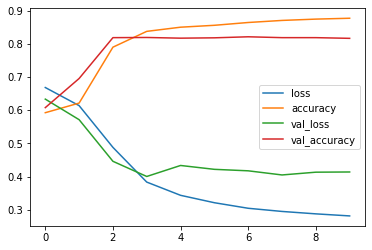

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
# DỰ đoán: 0.5: phản động
sample_text = ('Nhà_nước việt_nam tuyệt_vời')
predictions = model.predict(np.array([sample_text]))
print(predictions)

[[0.3607284]]


In [ ]:
sample_text = ('tôi yêu quê hương tôi')
predictions = model.predict(np.array([sample_text]))
print(predictions)

[[0.15605249]]


In [ ]:
sample_text = ('Cộng_sản bán nước hại dân')
predictions = model.predict(np.array([sample_text]))
print(predictions)

[[0.8303632]]


In [ ]:
sample_text = ('lãnh đạo ăn thuế của dân ra nước ngoài sống chỉ khổ dân chúng sống dưới chế độ tàn ác')
predictions = model.predict(np.array([sample_text]))
print(predictions)

[[0.9935022]]


In [ ]:
sample_text = ('hôm qua tôi vừa đi ăn về nhặt được 1 nghìn đô gửi lại anh cán bộ rất tốt đã trả người mất')
predictions = model.predict(np.array([sample_text]))
print(predictions)

[[0.07526772]]


In [ ]:
sample_text = ('việt nam gia nhập hd thương mại tự do eu, kinh tế phát triển vững vàng')
predictions = model.predict(np.array([sample_text]))
print(predictions)

[[0.26524732]]


In [ ]:
sample_text = ('hà nội tuyệt đẹp trong tôi')
predictions = model.predict(np.array([sample_text]))
print(predictions)

[[0.21882296]]
